In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
dataset = pd.read_csv('../Mall_Customers.csv')

In [36]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [37]:
X = dataset.iloc[:, 3:5].values

In [38]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import euclidean_distances
# Calculate the similarity matrix (negative squared Euclidean distance)
similarity_matrix = -euclidean_distances(X, squared=True)

In [39]:
similarity_matrix

array([[    -0.,  -1764.,  -1090., ..., -13546., -15325., -16820.],
       [ -1764.,     -0.,  -5626., ..., -12370., -18853., -14888.],
       [ -1090.,  -5626.,     -0., ..., -16724., -14785., -20570.],
       ...,
       [-13546., -12370., -16724., ...,     -0.,  -3257.,   -202.],
       [-15325., -18853., -14785., ...,  -3257.,     -0.,  -4225.],
       [-16820., -14888., -20570., ...,   -202.,  -4225.,     -0.]])

In [40]:
# Apply Affinity Propagation
affinity_propagation = AffinityPropagation(affinity='precomputed', random_state=0)
affinity_propagation.fit(similarity_matrix)

AffinityPropagation(affinity='precomputed', random_state=0)

In [41]:
# Get cluster centers (exemplars) and labels
cluster_centers_indices = affinity_propagation.cluster_centers_indices_
labels = affinity_propagation.labels_

In [42]:
cluster_centers_indices

array([ 22,  25,  26,  58,  95, 121, 144, 149, 159, 189, 190])

In [43]:
labels

array([ 2,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  2,
        1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  3,  2,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  2,  1,  2,  1,  2,  3,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  4,  5,  5,  4,  4,  4,  5,  4,  5,  4,
        4,  4,  4,  5,  4,  4,  5,  4,  4,  4,  5,  5,  4,  4,  5,  4,  5,
        4,  4,  5,  4,  7,  5,  8,  5,  7,  6,  8,  6,  8,  5,  8,  6,  7,
        6,  8,  6,  8,  6,  7,  5,  7,  6,  7,  5,  8,  6,  7,  6,  7,  6,
        8,  6,  7,  6,  8,  6,  8,  5,  7,  6,  7,  6,  8,  6,  7, 10,  8,
        6,  8,  6,  7,  6,  7,  6,  8, 10,  9, 10,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9])

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\

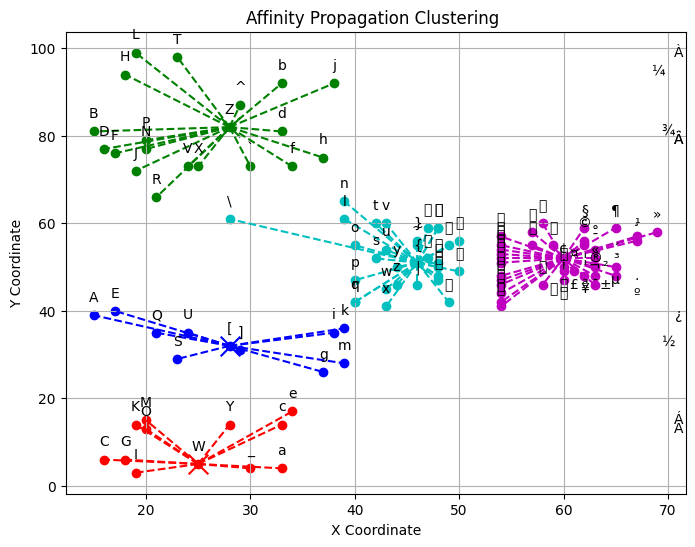

In [44]:
# Plot the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm']
for i, color in enumerate(colors):
    data_points = X[labels == i]
    for point in data_points:
        plt.scatter(point[0], point[1], c=color, marker='o')

    exemplar = X[cluster_centers_indices[i]]
    plt.scatter(exemplar[0], exemplar[1], c=color, marker='x', s=200)  # Exemplars marked with 'x'
    
    for point in data_points:
        plt.plot([exemplar[0], point[0]], [exemplar[1], point[1]], color=color, linestyle='--')

# Annotate the points
for idx, point in enumerate(X):
    plt.annotate(f'{chr(65 + idx)}', (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Affinity Propagation Clustering ')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()



c:\Python312\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


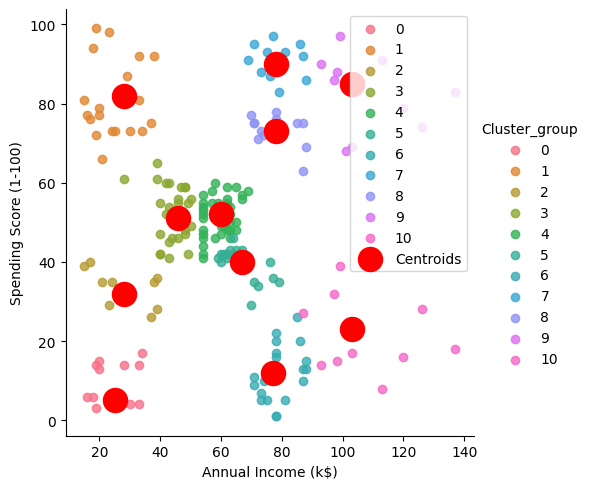

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AffinityPropagation
import seaborn as sns

# Load the dataset
dataset = pd.read_csv('../Mall_Customers.csv')

# Extract the relevant features
X = dataset.iloc[:, 3:5].values

# Apply Affinity Propagation
aff_prop = AffinityPropagation(random_state=42)
y_aff_prop = aff_prop.fit_predict(X)

# Add cluster group to the dataset
supervised = dataset.copy()
supervised['Cluster_group'] = y_aff_prop

# Save the clustered dataset to a CSV file
supervised.to_csv("cluster_aff_prop.csv", index=False)

# Get cluster centers
centroids = aff_prop.cluster_centers_

# Visualize the clusters
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], 
                   hue=supervised.columns[5], fit_reg=False, legend=True, legend_out=True)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.legend()
plt.show()


Cluster centers:
 [[ 54  28  14]
 [ 29  28  82]
 [ 40  29  31]
 [ 27  46  51]
 [ 63  48  51]
 [ 48  54  46]
 [ 23  62  41]
 [ 32  77  74]
 [ 34  78  90]
 [ 43  78  17]
 [ 41 103  17]
 [ 36 103  85]]


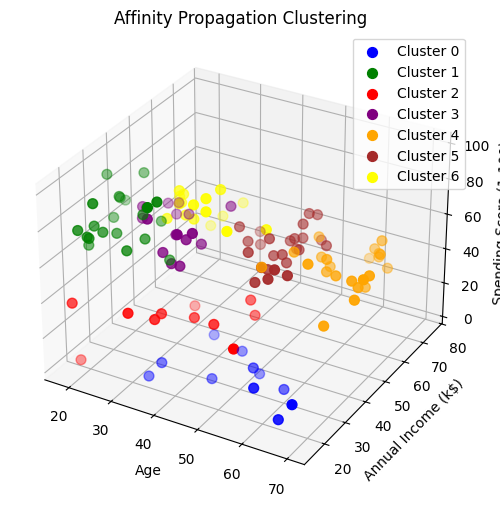

In [46]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('../Mall_Customers.csv')

# Convert data to DataFrame
df = pd.DataFrame(data)

# Encode categorical variable 'Genre'
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Perform Affinity Propagation clustering
cluster = AffinityPropagation(random_state=42)
cluster_labels = cluster.fit_predict(X)

# Add cluster labels to DataFrame
df['Cluster'] = cluster_labels

# Print cluster centers (if needed)
print("Cluster centers:\n", cluster.cluster_centers_)

# Visualize the clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'yellow']
for cluster_label, color in zip(range(len(colors)), colors):
    ax.scatter(X[cluster_labels == cluster_label]['Age'], 
               X[cluster_labels == cluster_label]['Annual Income (k$)'],
               X[cluster_labels == cluster_label]['Spending Score (1-100)'],
               c=color, s=50, label=f'Cluster {cluster_label}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Affinity Propagation Clustering')

plt.legend()
plt.show()
